### About the Dataset

This dataset was built by augmenting datasets of rainfall, climate and fertilizer data available for India.

### Data Description

N - ratio of Nitrogen content in soil<br>
P - ratio of Phosphorus content in soil<br>
K - ratio of Potassium content in soil<br>
temperature - temperature in degree Celsius<br>
humidity - relative humidity in %<br>
ph - ph value of the soil<br>
rainfall - rainfall in mm<br>
crop - Suitable crop to grow (target variable)<br>

### Importing Basic Packages

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

### Load the Training DataSet

In [4]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")

In [5]:
#Checking the imported Data

train_data.head()

N      P      K  temperature   humidity        ph    rainfall      crop
0   17.0  136.0  196.0    23.871923  90.499390  5.882156  103.054809     apple
1   49.0   69.0   82.0    18.315615  15.361435  7.263119   81.787105  chickpea
2   74.0   49.0   38.0    23.314104  71.450905  7.488014  164.497037      jute
3  104.0   35.0   28.0    27.510061  50.666872  6.983732  143.995555    coffee
4   23.0   72.0   84.0    19.020613  17.131591  6.920251   79.926981  chickpea

### Explore the DataSet

In [6]:
#Values count for crop column

train_data['crop'].value_counts()

maize          75
mothbeans      75
rice           75
chickpea       75
apple          75
watermelon     75
cotton         75
muskmelon      75
pomegranate    75
kidneybeans    75
coffee         75
banana         75
mungbean       75
grapes         75
mango          75
orange         75
papaya         75
coconut        75
lentil         75
blackgram      75
pigeonpeas     75
jute           75
Name: crop, dtype: int64

In [8]:
#Shape of the dataset

train_data.shape

(1650, 8)

In [10]:
#Info about the data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1650 non-null   float64
 1   P            1650 non-null   float64
 2   K            1650 non-null   float64
 3   temperature  1650 non-null   float64
 4   humidity     1650 non-null   float64
 5   ph           1650 non-null   float64
 6   rainfall     1650 non-null   float64
 7   crop         1650 non-null   object 
dtypes: float64(7), object(1)
memory usage: 103.2+ KB


**Observation:** Clearly there are no missing values. And also, the data is equally distributed.

In [11]:
train_data.describe()

N            P            K  temperature     humidity  \
count  1650.000000  1650.000000  1650.000000  1650.000000  1650.000000   
mean     50.370308    53.419241    48.111081    25.647214    71.563115   
std      36.743966    33.320501    50.537044     5.005005    22.198130   
min       0.000000     5.000000     5.000000     9.467960    14.273280   
25%      21.000000    27.000000    20.552276    22.807269    60.120113   
50%      37.000000    52.000000    31.575398    25.656980    80.547206   
75%      84.738202    68.000000    49.000000    28.529953    90.003702   
max     136.000000   145.000000   205.000000    42.936054    99.981876   

                ph     rainfall  
count  1650.000000  1650.000000  
mean      6.485583   103.965778  
std       0.765865    55.510324  
min       3.525366    20.360011  
25%       5.986160    65.025621  
50%       6.426118    95.246217  
75%       6.924943   127.887636  
max       9.935091   298.560117

**Observation:** Since Mean and Median are almost similar, no scaling is required.

In [12]:
#Let's confirm for null values.

train_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

**Observation:** So as said earlier, this confirms there are no missing or null values in the dataset.

**Note:** I would do EDA but I Prefer pandas profiling as it gives a detailed report on how the data is behabing for the mkost part. 

In [14]:
report = pandas_profiling.ProfileReport(train_data)
report

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**Observations:**<br>

1- There are 7 Numerical columns and 1 Categorical column.<br>
2- There are 1650 entires out of which no missing value or null value present.<br>
3- P and K ar ea bit highly correlated rest all seems to be okay.<br>

### EDA

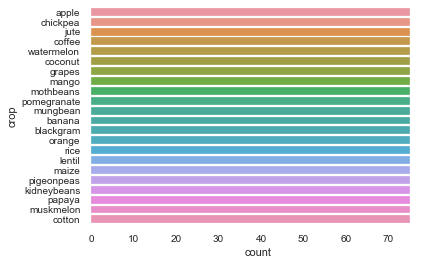

In [18]:
# Count plot for crop column
sns.countplot(y=train_data['crop'])

**Observation:** Clearly a very balanced dataset.

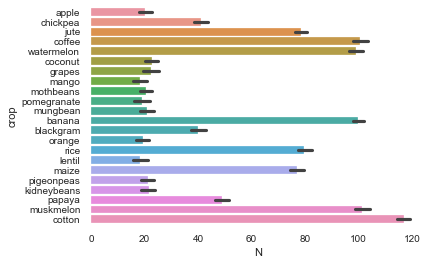

In [19]:
# Bar plot for crop vs N columns
sns.barplot(x='N',y='crop',data=train_data)

**Observation:** From the above we could conclude that few crops require high Nitrogen content. 

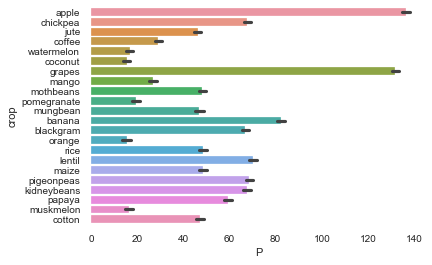

In [21]:
# Bar plot for crop vs P columns
sns.barplot(x='P',y='crop',data=train_data)

**Observation:** Only Apple and Grapes require high Phosphorous content.

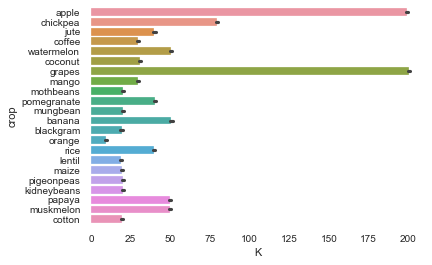

In [22]:
# Bar plot for crop vs K columns
sns.barplot(x='K',y='crop',data=train_data)

**Observation:** Again, Apple and Grapes need high potassium content in Soil.

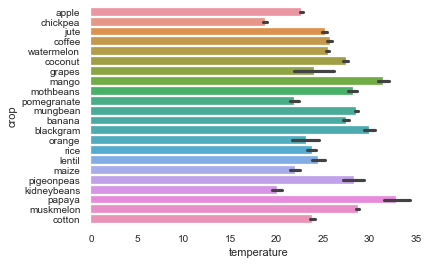

In [23]:
# Bar plot for crop vs temperature columns
sns.barplot(x='temperature',y='crop',data=train_data)

**Observation:** Seems all the crop requires temperature in excess of 18 degrees.

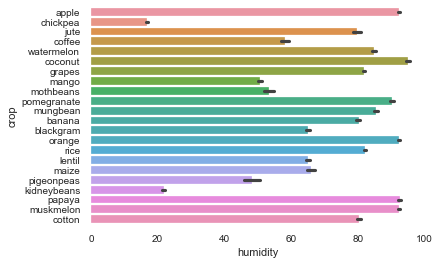

In [24]:
# Bar plot for crop vs humidity columns
sns.barplot(x='humidity',y='crop',data=train_data)

**Observation:** Chickpea and Kidneybeans require less humid conditions.

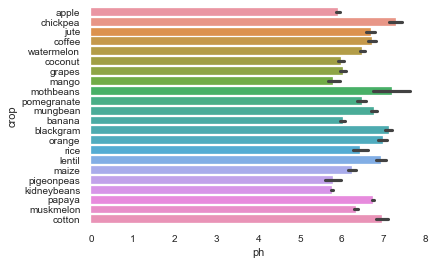

In [25]:
# Bar plot for crop vs ph columns
sns.barplot(x='ph',y='crop',data=train_data)

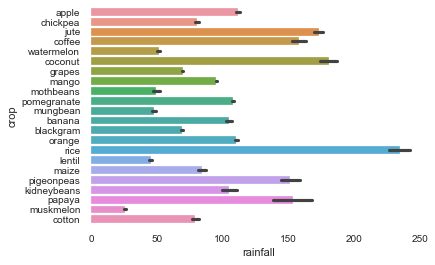

In [26]:
# Bar plot for crop vs rainfall columns
sns.barplot(x='rainfall',y='crop',data=train_data)

### Perform all the regular ML models and then Boosting models and analyze the metrics

In [27]:
# Assigning x and y variables for model building
y = train_data['crop']
X = train_data.drop('crop',1)

In [29]:
y.shape

(1650,)

In [30]:
X.shape

(1650, 7)

In [31]:
# Splitting the dataset to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.25)

### Performing Decision Tree Classification and analyzing the metrics

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [33]:
# Classification Report
print(metrics.classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        13
   blackgram       0.95      0.90      0.93        21
    chickpea       1.00      1.00      1.00        16
     coconut       0.95      1.00      0.97        18
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        21
        jute       1.00      0.87      0.93        15
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.93      0.72      0.81        18
       maize       1.00      1.00      1.00        13
       mango       1.00      1.00      1.00        20
   mothbeans       0.71      0.94      0.81        16
    mungbean       1.00      0.94      0.97        18
   muskmelon       1.00      0.96      0.98        25
      orange       0.95      0.95      0.95        22
      papaya       1.00    

In [36]:
dt_acc = metrics.accuracy_score(dt_pred,y_test)
dt_acc

0.9685230024213075

In [37]:
# Cohen kappa score
dt_cohen = metrics.cohen_kappa_score(dt_pred,y_test)
dt_cohen

0.9669671147752792

In [38]:
#Train Score
dt_train = dt.score(X_train,y_train)
dt_train

1.0

In [39]:
# Test score
dt_test = dt.score(X_test,y_test)
dt_test

0.9685230024213075

### Performing Random Forest Classification and analyzing the metrics

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [41]:
print(metrics.classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        21
        jute       1.00      0.87      0.93        15
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        14
       maize       1.00      1.00      1.00        13
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [42]:
rf_acc = metrics.accuracy_score(rf_pred,y_test)
rf_acc

0.9951573849878934

### Performing KNearest Neighbors and analyzing the metrics

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [45]:
print(metrics.classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        21
        jute       0.85      0.79      0.81        14
 kidneybeans       1.00      0.92      0.96        25
      lentil       1.00      1.00      1.00        14
       maize       1.00      1.00      1.00        13
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [46]:
knn_acc = metrics.accuracy_score(knn_pred,y_test)
knn_acc

0.9830508474576272

### Performing Logistic Regression and fitting the model

In [48]:
lr = LogisticRegression(solver='newton-cg',multi_class='multinomial')
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

C:\Users\Nikhil Jain\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [49]:
lr_acc = metrics.accuracy_score(lr_pred,y_test)
lr_acc

0.9806295399515739

In [50]:
print(metrics.classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        16
      cotton       1.00      0.96      0.98        23
      grapes       1.00      1.00      1.00        21
        jute       0.85      0.85      0.85        13
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.86      1.00      0.92        12
       maize       0.92      1.00      0.96        12
       mango       1.00      0.95      0.98        21
   mothbeans       0.95      0.91      0.93        22
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [51]:
lr_train = lr.score(X_train,y_train)
lr_train

0.994341147938561

### Performing Ada Boost Classification and analyzing the metrics

In [53]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
ab_pred = ab.predict(X_test)

In [55]:
print(metrics.classification_report(ab_pred,y_test))

              precision    recall  f1-score   support

       apple       1.00      0.43      0.60        37
      banana       1.00      0.04      0.08       313
   blackgram       0.00      0.00      0.00         0
    chickpea       1.00      1.00      1.00        16
     coconut       0.00      0.00      0.00         0
      coffee       0.00      0.00      0.00         0
      cotton       0.00      0.00      0.00         0
      grapes       0.00      0.00      0.00         0
        jute       0.00      0.00      0.00         0
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.00      0.00      0.00         0
       maize       0.00      0.00      0.00         0
       mango       0.00      0.00      0.00         0
   mothbeans       0.00      0.00      0.00         0
    mungbean       0.00      0.00      0.00         0
   muskmelon       1.00      1.00      1.00        24
      orange       0.00      0.00      0.00         0
      papaya       0.00    

### Performing Gradient Boosting Classification and analyzing the metrics

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

In [57]:
print(metrics.classification_report(gb_pred,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        13
   blackgram       1.00      0.95      0.98        21
    chickpea       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        16
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        21
        jute       1.00      0.62      0.76        21
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        14
       maize       1.00      0.87      0.93        15
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        22
      papaya       0.87    

In [58]:
gb_acc = metrics.accuracy_score(gb_pred,y_test)
gb_acc

0.9709443099273608

In [59]:
gb_train = gb.score(X_train,y_train)
gb_train

1.0

In [60]:

# Test score for Gradient Boosting Classifier
gb_test = gb.score(X_test,y_test)
gb_test

0.9709443099273608

### Performing XG Boost Classification and analyzing the metrics

In [61]:
from xgboost.sklearn import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [62]:
xgb_acc = metrics.accuracy_score(xgb_pred,y_test)
xgb_acc

0.9878934624697336

In [63]:
xgb_train = xgb_model.score(X_train,y_train)
xgb_train

1.0

In [64]:
xgb_test = xgb_model.score(X_test,y_test)
xgb_test

0.9878934624697336

### Performing LightGBM Classification and analyzing the metrics

In [65]:
import lightgbm as lgb

lightgb = lgb.LGBMClassifier()
lightgb.fit(X_train,y_train)
lgb_pred = lightgb.predict(X_test)

In [66]:
print(metrics.classification_report(lgb_pred,y_test))

              precision    recall  f1-score   support

       apple       0.88      1.00      0.93        14
      banana       1.00      1.00      1.00        13
   blackgram       0.95      0.90      0.93        21
    chickpea       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        19
      coffee       0.94      1.00      0.97        15
      cotton       0.82      1.00      0.90        18
      grapes       1.00      0.91      0.95        23
        jute       1.00      0.65      0.79        20
 kidneybeans       0.91      1.00      0.95        21
      lentil       1.00      0.93      0.97        15
       maize       1.00      0.93      0.96        14
       mango       1.00      0.95      0.98        21
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [67]:
light_acc = metrics.accuracy_score(lgb_pred,y_test)
light_acc

0.9588377723970944

### Loading the test data

In [68]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')

In [69]:
test_data.head()

N         P          K  temperature   humidity        ph   rainfall
0   22.00000  51.00000  16.000000    27.965837  61.349001  8.639586  70.104721
1  130.20691  59.20691  18.586179    25.123987  82.356124  6.707583  91.431992
2   28.00000  27.00000  34.000000    32.454653  50.696938  6.526654  95.048716
3   40.00000  61.00000  22.000000    20.949818  65.810876  7.002216  44.239130
4   28.00000  46.00000  16.000000    29.008124  84.960894  6.664188  45.910114

In [70]:
test_data.shape

(550, 7)

In [71]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            550 non-null    float64
 1   P            550 non-null    float64
 2   K            550 non-null    float64
 3   temperature  550 non-null    float64
 4   humidity     550 non-null    float64
 5   ph           550 non-null    float64
 6   rainfall     550 non-null    float64
dtypes: float64(7)
memory usage: 30.2 KB


In [72]:
dt_test_data_pred = dt.predict(test_data)

In [73]:
dt_res = pd.DataFrame(dt_test_data_pred) 
dt_res.index = test_data.index 
dt_res.columns = ["prediction"]
dt_res.to_csv("DecisionTree_prediction_results.csv", index = False) 

In [74]:
rf_test_data_pred = rf.predict(test_data)

In [75]:
rf_res = pd.DataFrame(rf_test_data_pred) 
rf_res.index = test_data.index 
rf_res.columns = ["prediction"]
rf_res.to_csv("RandomForest__prediction_results.csv", index = False) 

In [76]:
knn_test_data_pred = knn.predict(test_data)

In [77]:
knn_res = pd.DataFrame(knn_test_data_pred) 
knn_res.index = test_data.index 
knn_res.columns = ["prediction"]
knn_res.to_csv("KNN__prediction_results.csv", index = False) 

In [78]:
lr_test_data_pred = lr.predict(test_data)

In [79]:
lr_res = pd.DataFrame(lr_test_data_pred) 
lr_res.index = test_data.index 
lr_res.columns = ["prediction"]
lr_res.to_csv("LogisticRegression_prediction_results.csv", index = False) 

In [80]:
gb_test_data_pred = gb.predict(test_data)

In [81]:
gb_res = pd.DataFrame(gb_test_data_pred) 
gb_res.index = test_data.index 
gb_res.columns = ["prediction"]
gb_res.to_csv("GradientBoosting_prediction_results.csv", index = False) 

In [82]:
xgb_test_data_pred = xgb_model.predict(test_data)

In [83]:
xgb_res = pd.DataFrame(xgb_test_data_pred) 
xgb_res.index = test_data.index 
xgb_res.columns = ["prediction"]
xgb_res.to_csv("XGBoost_prediction_results.csv", index = False) 

In [84]:
lgb_test_data_pred = lightgb.predict(test_data)

In [85]:
lgb_res = pd.DataFrame(lgb_test_data_pred) 
lgb_res.index = test_data.index 
lgb_res.columns = ["prediction"]
lgb_res.to_csv("LGB_prediction_results.csv", index = False) 